# Does school funding impact students academic performance?

<img src="images/education-header.jpg" width="900" />



**Credit:**  [techxend](https://www.techxtend.com/site/content/education/) 

In [15]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
import scipy.stats as st

#sns.set_theme(style="ticks", color_codes=True)


warnings.filterwarnings("ignore")  # Suppress all warnings

In [16]:
# read file
df = pd.read_csv('final_economic_merged.csv', index_col = 0)
df.head()

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,...,Total Tested with Scores,CAASPP Reported Enrollment,Students Tested,Students with Scores,Total Standard Exceeded,Total Standard Met,Total Standard Met and Above,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged
11111,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Two or More Races,1206.0,1.0,1.0,2574.514286,...,2660.0,388.0,380.0,380.0,182.0,111.0,293.0,44.0,43.0,Not Disadvantaged
7174,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Asian or Asian/Pacific Islander,3722.0,1.0,1.0,2590.300000,...,6146.0,895.0,878.0,878.0,419.0,299.0,718.0,106.0,54.0,Not Disadvantaged
7173,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Asian or Asian/Pacific Islander,3722.0,1.0,2.0,2600.685714,...,6181.0,895.0,883.0,883.0,458.0,240.0,698.0,124.0,61.0,Not Disadvantaged
7172,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Asian or Asian/Pacific Islander,3722.0,1.0,2.0,2548.071429,...,3591.0,519.0,513.0,513.0,134.0,167.0,301.0,131.0,81.0,Disadvantaged
11109,61119.0,ALAMEDA UNIFIED,11159.0,96642000.0,8660.45,Two or More Races,1206.0,1.0,1.0,2410.766667,...,630.0,60.0,60.0,60.0,5.0,9.0,14.0,18.0,28.0,Disadvantaged


In [17]:
# columns present on the dataset
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged'],
      dtype='object')

In [18]:
#Converting all the assessment columns back to  percentage columns for exceeded, nearly met, not met to show completion results as percentage of test taken
df['Percentate Std Exceed'] =(df['Total Standard Exceeded']/df['Students Tested']*100).round(decimals=0)
df['Percentage Std Met'] =(100*df['Total Standard Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Nearly Met'] =(100*df['Total Standard Nearly Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Not Met'] =(100*df['Total Standard Not Met']/df['Students Tested']).round(decimals=0)
df['Percentage Std Met and Above'] =(100*df['Total Standard Met and Above']/df['Students Tested']).round(decimals=0)
#Percentage was multiplied by the students tested information and not the total enrollment information.
#Students tested in Math and Literacy can be the same students or different students, we don't have that information.
#we are adding the results of both exams, this can cause a duplicate in value of students tested, I will separate both datasets

In [19]:
df['Pass'] = df['Percentate Std Exceed'] + df['Percentage Std Met']
df['Fail'] = df['Percentage Std Nearly Met'] + df['Percentage Std Not Met']

In [20]:
# columns present on the dataset
df.columns

Index(['District Code', 'Agency Name', 'Total Enrollment', 'Total Revenue',
       'Revenue per student', 'Subgroup ID', 'Count Enrollment per ethnicity',
       'County Code', 'Test Id', 'Mean Scale Score',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Disadvantaged', 'Percentate Std Exceed',
       'Percentage Std Met', 'Percentage Std Nearly Met',
       'Percentage Std Not Met', 'Percentage Std Met and Above', 'Pass',
       'Fail'],
      dtype='object')

In [21]:
# checking unique ethinicities present in subgroup ID 
df['Subgroup ID'].unique()

array(['Two or More Races', 'Asian or Asian/Pacific Islander', 'Black',
       'Hispanic', 'White', 'Hawaiian Nat./Pacific Isl.',
       'American Indian/Alaska Native'], dtype=object)

In [9]:
# filtering for ethiniticies of interest
# Step 1: create list of the ethiniticies of interest
#list1 = ['White', 'Black', 'Hispanic', 'Asian or Pacific Islander', 'Two or More Races']

# Step 2: filter based on the list above
#df = df[df['Subgroup ID'].isin(list1)]
#df.head(5)

In [22]:
# filtering based on total enrollment
df = df[df['Total Enrollment'] != 0]
df = df[df['Total Enrollment'] > 250]

# need to filter out the 6 schools that have more students tested than enrolled

In [11]:
# checking total enrollment data
# we see that there's a wide number of students per district. 
# the smallest district has 251 students and the largest over 630,000 students
df['Total Enrollment'].describe()

count      8215.000000
mean      13977.693974
std       38996.903019
min         251.000000
25%        2696.000000
50%        7066.000000
75%       15377.500000
max      633621.000000
Name: Total Enrollment, dtype: float64

In [12]:
df['Mean Scale Score'].describe()

count    8215.000000
mean     2518.456294
std        59.984766
min      2327.700000
25%      2473.450000
50%      2512.533333
75%      2557.800000
max      2775.200000
Name: Mean Scale Score, dtype: float64

In [13]:
# checking revenue per student data
# we see that the average capiutal per student is around 9640
# the minimum is 0 and the max capital per student is over 77000 clearly an outlier - we need to fix these
df['Revenue per student'].describe()

count      8215.000000
mean       9610.568426
std        4565.493615
min           0.000000
25%        7716.220000
50%        9512.710000
75%       11376.780000
max      167709.580000
Name: Revenue per student, dtype: float64

In [24]:
df.to_csv('dashboard_final_merged.csv',index = False, header=True)

In [14]:
# dataset containing school districts with over $20,000 revenue per student
df_high_funding = df[(df['Revenue per student'] > 20_000)]

# update the main dataset to not include schools with over 20k revenue per student nor zero revenue per student
df = df[(df['Revenue per student'] < 20_000)]
df = df[(df['Revenue per student'] != 0)]

print(df_high_funding.shape)


(106, 28)


In [78]:
# Checking what the dataset looks like now
df.shape

(7935, 28)

--------------------

# Dictrict size per enrollment

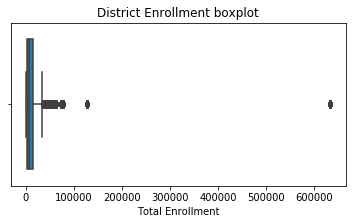

In [79]:
#Create a box plot to show the outliers on our data in regards of size.
plt.figure(figsize=(6,3))
sns.boxplot(df['Total Enrollment']),#orient='v')
plt.title('District Enrollment boxplot')
plt.show()

In [80]:
#We created 4 groups of districts by size of enrollment. 
large_districts_df = df[df['Total Enrollment'] >= 60_000]
medium_districts_df= df[(df['Total Enrollment'] < 60_000) & (df['Total Enrollment'] >= 30_000)]
small_districts_df = df[(df['Total Enrollment'] < 30_000) & (df['Total Enrollment'] >= 10_000)]
smaller_districts_df = df[(df['Total Enrollment'] < 10_000) & (df['Total Enrollment'] >= 5_000)]

## We will firts look at large districts, distribution of students by ethnicity, and understand if there is any pattern on grades by ethnicity

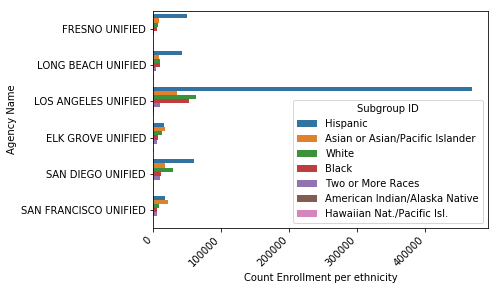

In [81]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Count Enrollment per ethnicity',y='Agency Name',hue='Subgroup ID',data=large_districts_df)
plt.xticks(rotation=45, ha='right')
plt.show()


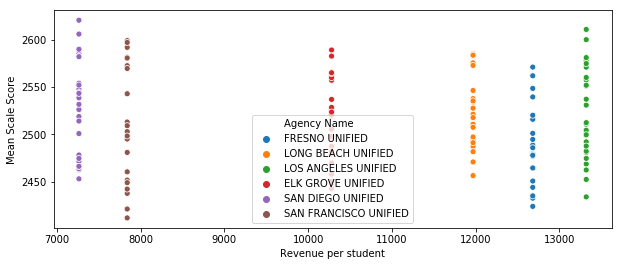

In [82]:
#We are looking at the schools and were are they in the revenue/score comparison
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Revenue per student', y='Mean Scale Score', hue='Agency Name',data=large_districts_df)
plt.show()

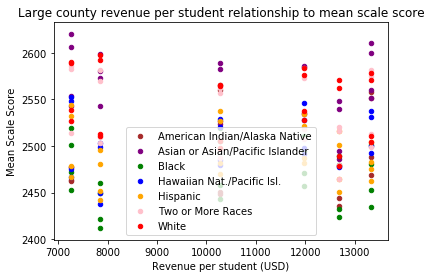

In [85]:
colors = {
    "Black": "green",
    "Hispanic": "orange",
    "White": "red",
    "Asian or Asian/Pacific Islander": "purple",
    'Hawaiian Nat./Pacific Isl.': "blue",
    'American Indian/Alaska Native':"brown",
    'Two or More Races':'pink'
}
_, ax = plt.subplots()
for key, group in large_districts_df.groupby("Subgroup ID"):
    group.plot.scatter(ax=ax, x="Revenue per student", y="Mean Scale Score", label=key, color=colors[key])
ax.set_xlabel("Revenue per student (USD)")
ax.set_ylabel("Mean Scale Score")
_ = ax.set_title(
    "Large county revenue per student relationship to mean scale score"
)

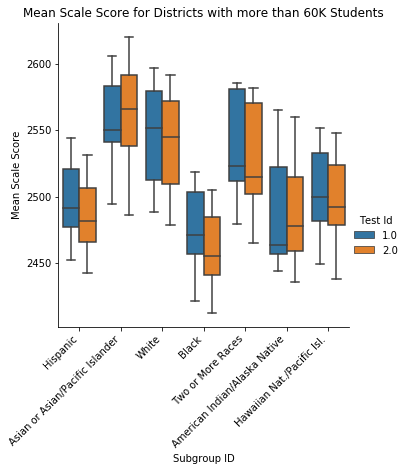

In [86]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=large_districts_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score for Districts with more than 60K Students')

In [87]:
ld_corr_df= large_districts_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])

In [88]:
ld_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.509769,0.070509,0.050024,-0.049895
Revenue per student,0.509769,1.000000,-0.043934,-0.066022,0.066911
Mean Scale Score,0.070509,-0.043934,1.000000,0.948222,-0.947413
Pass,0.050024,-0.066022,0.948222,1.000000,-0.999505
Fail,-0.049895,0.066911,-0.947413,-0.999505,1.000000


In [92]:
#Scatter plot for each ethnicity.
ld_asian_df = large_districts_df[large_districts_df['Subgroup ID']=='Asian or Asian/Pacific Islander']
ld_black_df = large_districts_df[large_districts_df['Subgroup ID']=='Black']
ld_amerindian_df = large_districts_df[large_districts_df['Subgroup ID']=='American Indian/Alaska Native']
ld_hawaiian_df = large_districts_df[large_districts_df['Subgroup ID']=='Hawaiian Nat./Pacific Isl.']
ld_two_df = large_districts_df[large_districts_df['Subgroup ID']=='Black']
ld_hispanic_df = large_districts_df[large_districts_df['Subgroup ID']=='Hispanic']
ld_white_df = large_districts_df[large_districts_df['Subgroup ID']=='White']

best fit line:
y = 2462.46 + 0.00x


Text(0,0.5,'Mean Scale Score')

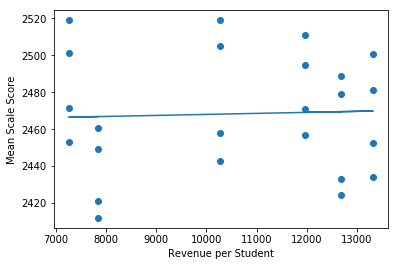

In [93]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b
a, b = best_fit(ld_black_df['Revenue per student'],ld_black_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(ld_black_df['Revenue per student'],ld_black_df['Mean Scale Score'])
yfit = [a + b * xi for xi in ld_black_df['Revenue per student']]
plt.plot(ld_black_df['Revenue per student'], yfit)
plt.xlabel('Revenue per Student')
plt.ylabel('Mean Scale Score')

best fit line:
y = 2580.23 + -0.00x


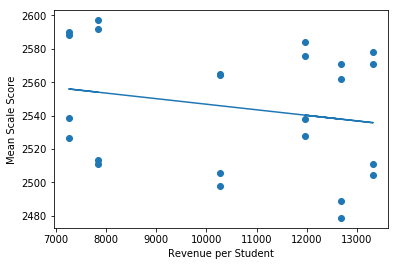

In [94]:
a, b = best_fit(ld_white_df['Revenue per student'],ld_white_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(ld_white_df['Revenue per student'],ld_white_df['Mean Scale Score'])
yfit = [a + b * xi for xi in ld_white_df['Revenue per student']]
plt.plot(ld_white_df['Revenue per student'], yfit)
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [95]:
white_corr_df= ld_white_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
white_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.486950,-0.027003,-0.018290,0.027472
Revenue per student,0.486950,1.000000,-0.212995,-0.188366,0.197502
Mean Scale Score,-0.027003,-0.212995,1.000000,0.978056,-0.974409
Pass,-0.018290,-0.188366,0.978056,1.000000,-0.999357
Fail,0.027472,0.197502,-0.974409,-0.999357,1.000000


best fit line:
y = 2494.28 + -0.00x


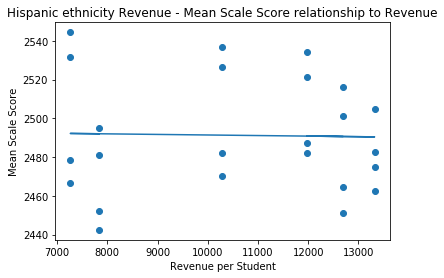

In [96]:
a, b = best_fit(ld_hispanic_df['Revenue per student'],ld_hispanic_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(ld_hispanic_df['Revenue per student'],ld_hispanic_df['Mean Scale Score'])
yfit = [a + b * xi for xi in ld_hispanic_df['Revenue per student']]
plt.plot(ld_hispanic_df['Revenue per student'], yfit)
plt.title('Hispanic ethnicity Revenue - Mean Scale Score relationship to Revenue')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2606.70 + -0.00x


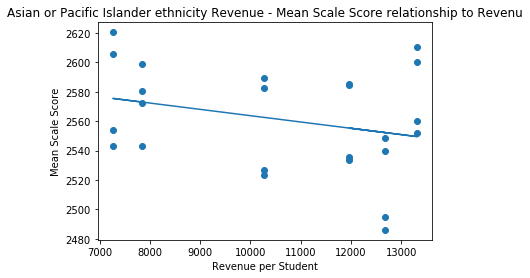

In [97]:
a, b = best_fit(ld_asian_df['Revenue per student'],ld_asian_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(ld_asian_df['Revenue per student'],ld_asian_df['Mean Scale Score'])
yfit = [a + b * xi for xi in ld_asian_df['Revenue per student']]
plt.plot(ld_asian_df['Revenue per student'], yfit)
plt.title('Asian or Pacific Islander ethnicity Revenue - Mean Scale Score relationship to Revenu')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [98]:
asian_corr_df= ld_asian_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
asian_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.486950,0.272115,0.221863,-0.222290
Revenue per student,0.486950,1.000000,-0.285774,-0.287062,0.279380
Mean Scale Score,0.272115,-0.285774,1.000000,0.952840,-0.953568
Pass,0.221863,-0.287062,0.952840,1.000000,-0.999102
Fail,-0.222290,0.279380,-0.953568,-0.999102,1.000000


best fit line:
y = 2448.83 + 0.00x


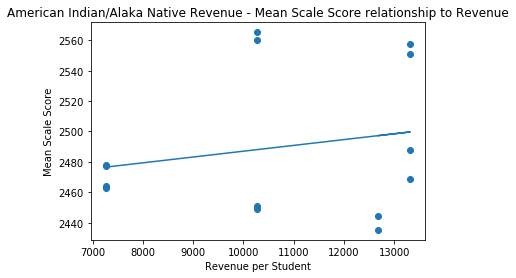

In [99]:
a, b = best_fit(ld_amerindian_df['Revenue per student'],ld_amerindian_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(ld_amerindian_df['Revenue per student'],ld_amerindian_df['Mean Scale Score'])
yfit = [a + b * xi for xi in ld_amerindian_df['Revenue per student']]
plt.plot(ld_amerindian_df['Revenue per student'], yfit)
plt.title('American Indian/Alaka Native Revenue - Mean Scale Score relationship to Revenue')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [100]:
amerindian_corr_df= ld_amerindian_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
amerindian_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.630894,0.351594,0.135602,-0.139947
Revenue per student,0.630894,1.000000,0.203286,-0.345633,0.350023
Mean Scale Score,0.351594,0.203286,1.000000,0.707254,-0.701433
Pass,0.135602,-0.345633,0.707254,1.000000,-0.999511
Fail,-0.139947,0.350023,-0.701433,-0.999511,1.000000


In [101]:
white_corr_df= ld_white_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
white_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.486950,-0.027003,-0.018290,0.027472
Revenue per student,0.486950,1.000000,-0.212995,-0.188366,0.197502
Mean Scale Score,-0.027003,-0.212995,1.000000,0.978056,-0.974409
Pass,-0.018290,-0.188366,0.978056,1.000000,-0.999357
Fail,0.027472,0.197502,-0.974409,-0.999357,1.000000


best fit line:
y = 2462.46 + 0.00x


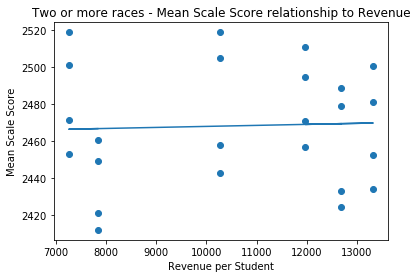

In [102]:
a, b = best_fit(ld_two_df['Revenue per student'],ld_two_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(ld_two_df['Revenue per student'],ld_two_df['Mean Scale Score'])
yfit = [a + b * xi for xi in ld_two_df['Revenue per student']]
plt.plot(ld_two_df['Revenue per student'], yfit)
plt.title('Two or more races - Mean Scale Score relationship to Revenue')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

### It seems that revenue per student has a negative correlation to Mean Scale score or students passing. As we noted on each of the different ethnicities it would seem the larger the revenue per student the lower test scores, whith the highest impact on ethnicities - American Indian/Alaska Native, White and Asian or Pacific Islander.

# Medium size Districts analysis

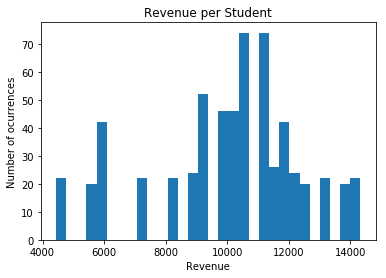

In [103]:
_ = plt.hist(medium_districts_df['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

### FIND SOME BETTER WAY TO SHOW THIS

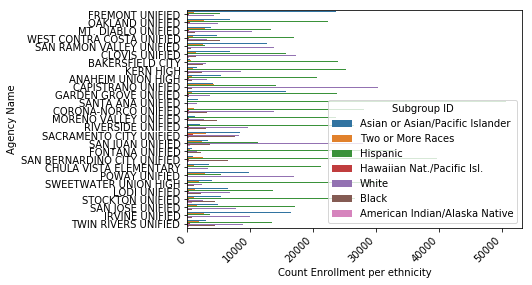

In [104]:
#Which is the ethnicity precence on each of these schools
plt.figure(figsize=(6, 4))
sns.barplot(x='Count Enrollment per ethnicity',y='Agency Name',hue='Subgroup ID',data=medium_districts_df)
plt.xticks(rotation=45, ha='right')
plt.show()

best fit line:
y = 2575.77 + -0.01x


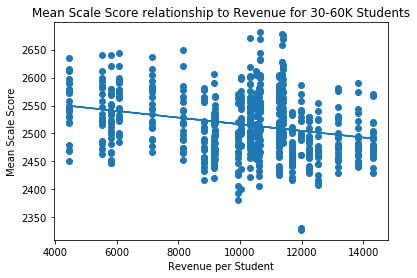

In [105]:
a, b = best_fit(medium_districts_df['Revenue per student'],medium_districts_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(medium_districts_df['Revenue per student'],medium_districts_df['Mean Scale Score'])
yfit = [a + b * xi for xi in medium_districts_df['Revenue per student']]
plt.plot(medium_districts_df['Revenue per student'], yfit)
plt.title('Mean Scale Score relationship to Revenue for 30-60K Students')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [106]:
medium_corr_df= medium_districts_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
medium_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.069334,-0.015143,-0.009894,0.011858
Revenue per student,0.069334,1.000000,-0.257458,-0.309557,0.309205
Mean Scale Score,-0.015143,-0.257458,1.000000,0.847862,-0.848379
Pass,-0.009894,-0.309557,0.847862,1.000000,-0.999566
Fail,0.011858,0.309205,-0.848379,-0.999566,1.000000


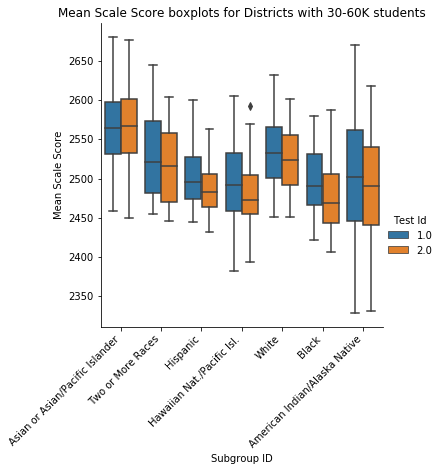

In [107]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=medium_districts_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts with 30-60K students')

### We continue to see the negative correlation to Revenue per student on this size districts - 30-60K students. 

### We see also that the difference in mean scale scores reduces between ethnicities for these districts, which in the larger districts we saw a larger difference between them on results.

# Small Districts Analysis

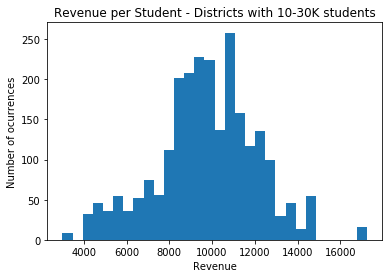

In [108]:
_ = plt.hist(small_districts_df['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student - Districts with 10-30K students")

best fit line:
y = 2580.53 + -0.01x


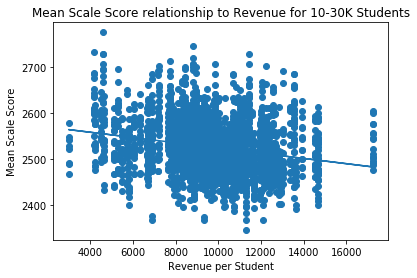

In [109]:
a, b = best_fit(small_districts_df['Revenue per student'],small_districts_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(small_districts_df['Revenue per student'],small_districts_df['Mean Scale Score'])
yfit = [a + b * xi for xi in small_districts_df['Revenue per student']]
plt.plot(small_districts_df['Revenue per student'], yfit)
plt.title('Mean Scale Score relationship to Revenue for 10-30K Students')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

In [110]:
small_corr_df= small_districts_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
small_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.107278,0.041239,0.015490,-0.016953
Revenue per student,0.107278,1.000000,-0.217778,-0.209286,0.210295
Mean Scale Score,0.041239,-0.217778,1.000000,0.832702,-0.833202
Pass,0.015490,-0.209286,0.832702,1.000000,-0.999549
Fail,-0.016953,0.210295,-0.833202,-0.999549,1.000000


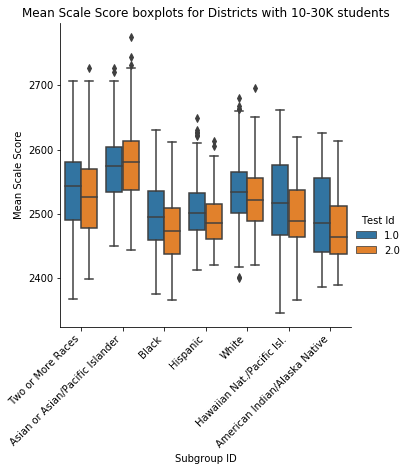

In [111]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=small_districts_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts with 10-30K students')

### The downward slope and negative correlation continue to appear on these size districts 10-30 K students. Looking at the mean scores and the difference between ethnicities, we want to evaluate the enrollment size against mean scores and studdents passing, which seems the larger the group the lower the scores.

best fit line:
y = 2517.06 + 0.00x


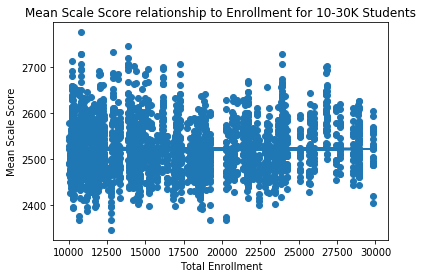

In [112]:
a, b = best_fit(small_districts_df['Total Enrollment'],small_districts_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(small_districts_df['Total Enrollment'],small_districts_df['Mean Scale Score'])
yfit = [a + b * xi for xi in small_districts_df['Revenue per student']]
plt.plot(small_districts_df['Total Enrollment'], yfit)
plt.title('Mean Scale Score relationship to Enrollment for 10-30K Students')
plt.xlabel('Total Enrollment')
_=plt.ylabel('Mean Scale Score')

In [121]:
asian_df = df[df['Subgroup ID']=='Asian or Asian/Pacific Islander']
black_df = df[df['Subgroup ID']=='Black']
amerindian_df = df[df['Subgroup ID']=='American Indian/Alaska Native']
hawaiian_df = df[df['Subgroup ID']=='Hawaiian Native/Pacific Islander']
two_df = df[df['Subgroup ID']=='Black']
hispanic_df = df[df['Subgroup ID']=='Hispanic']
white_df = df[df['Subgroup ID']=='White']

In [122]:
#Scatter plot for each ethnicity.
md_asian_df = medium_districts_df[medium_districts_df['Subgroup ID']=='Asian or Asian/Pacific Islander']
md_black_df = medium_districts_df[medium_districts_df['Subgroup ID']=='Black']
md_amerindian_df = medium_districts_df[medium_districts_df['Subgroup ID']=='American Indian/Alaska Native']
md_hawaiian_df = medium_districts_df[medium_districts_df['Subgroup ID']=='Hawaiian Nat./Pacific Isl.']
md_two_df = medium_districts_df[medium_districts_df['Subgroup ID']=='Black']
md_hispanic_df = medium_districts_df[medium_districts_df['Subgroup ID']=='Hispanic']
md_white_df = medium_districts_df[medium_districts_df['Subgroup ID']=='White']
sd_asian_df = small_districts_df[small_districts_df['Subgroup ID']=='Asian or Asian/Pacific Islander']
sd_black_df = small_districts_df[small_districts_df['Subgroup ID']=='Black']
sd_amerindian_df = small_districts_df[small_districts_df['Subgroup ID']=='American Indian/Alaska Native']
sd_hawaiian_df = small_districts_df[small_districts_df['Subgroup ID']=='Hawaiian Nat./Pacific Isl.']
sd_two_df = small_districts_df[small_districts_df['Subgroup ID']=='Black']
sd_hispanic_df = small_districts_df[small_districts_df['Subgroup ID']=='Hispanic']
sd_white_df = small_districts_df[small_districts_df['Subgroup ID']=='White']

In [123]:
asian_corr_df= asian_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
asian_corr_df.corr()

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.135718,0.667978,-0.021562,-0.020892,0.021974
Revenue per student,0.135718,1.000000,-0.049370,-0.303986,-0.337045,0.336540
Count Enrollment per ethnicity,0.667978,-0.049370,1.000000,0.042653,0.085488,-0.083616
Mean Scale Score,-0.021562,-0.303986,0.042653,1.000000,0.737157,-0.736959
Pass,-0.020892,-0.337045,0.085488,0.737157,1.000000,-0.999327
Fail,0.021974,0.336540,-0.083616,-0.736959,-0.999327,1.000000


best fit line:
y = 2551.36 + 0.00x


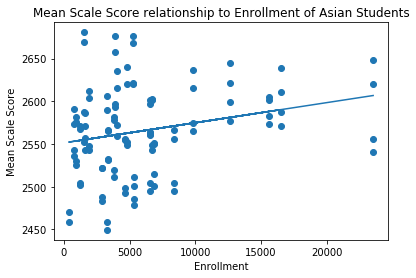

In [124]:
#We see a positive correllation on the enrollment per ethnicity on the specific ethnicity
a, b = best_fit(md_asian_df['Count Enrollment per ethnicity'],md_asian_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(md_asian_df['Count Enrollment per ethnicity'],md_asian_df['Mean Scale Score'])
yfit = [a + b * xi for xi in md_asian_df['Count Enrollment per ethnicity']]
plt.plot(md_asian_df['Count Enrollment per ethnicity'], yfit)
plt.title('Mean Scale Score relationship to Enrollment of Asian Students')
plt.xlabel('Enrollment')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2520.94 + 0.00x


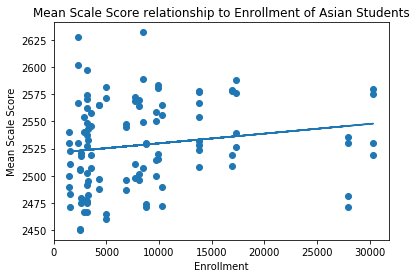

In [125]:
#We see a positive correllation on the enrollment per ethnicity on the specific ethnicity
a, b = best_fit(md_white_df['Count Enrollment per ethnicity'],md_white_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(md_white_df['Count Enrollment per ethnicity'],md_white_df['Mean Scale Score'])
yfit = [a + b * xi for xi in md_white_df['Count Enrollment per ethnicity']]
plt.plot(md_white_df['Count Enrollment per ethnicity'], yfit)
plt.title('Mean Scale Score relationship to Enrollment of Asian Students')
plt.xlabel('Enrollment')
_=plt.ylabel('Mean Scale Score')

In [126]:
black_corr_df= black_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
black_corr_df.corr()

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.071473,0.947729,-0.018937,0.000366,0.002666
Revenue per student,0.071473,1.000000,0.157857,-0.211272,-0.230491,0.230552
Count Enrollment per ethnicity,0.947729,0.157857,1.000000,-0.110272,-0.074372,0.077566
Mean Scale Score,-0.018937,-0.211272,-0.110272,1.000000,0.766463,-0.769409
Pass,0.000366,-0.230491,-0.074372,0.766463,1.000000,-0.999073
Fail,0.002666,0.230552,0.077566,-0.769409,-0.999073,1.000000


best fit line:
y = 2507.79 + -0.01x


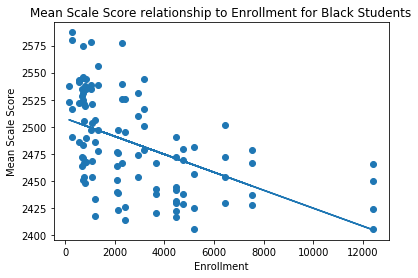

In [127]:
a, b = best_fit(md_black_df['Count Enrollment per ethnicity'],md_black_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(md_black_df['Count Enrollment per ethnicity'],md_black_df['Mean Scale Score'])
yfit = [a + b * xi for xi in md_black_df['Count Enrollment per ethnicity']]
plt.plot(md_black_df['Count Enrollment per ethnicity'], yfit)
plt.title('Mean Scale Score relationship to Enrollment for Black Students')
plt.xlabel('Enrollment')
_=plt.ylabel('Mean Scale Score')

best fit line:
y = 2504.56 + -0.00x


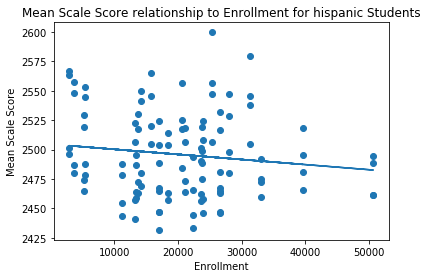

In [128]:
a, b = best_fit(md_hispanic_df['Count Enrollment per ethnicity'],md_hispanic_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(md_hispanic_df['Count Enrollment per ethnicity'],md_hispanic_df['Mean Scale Score'])
yfit = [a + b * xi for xi in md_hispanic_df['Count Enrollment per ethnicity']]
plt.plot(md_hispanic_df['Count Enrollment per ethnicity'], yfit)
plt.title('Mean Scale Score relationship to Enrollment for hispanic Students')
plt.xlabel('Enrollment')
_=plt.ylabel('Mean Scale Score')

### We can see how on smaller enrollment the scores seem to increase. For black and hispanic students.

# Smaller Districts Analysis

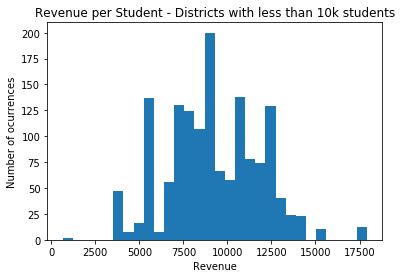

In [129]:
_ = plt.hist(smaller_districts_df['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student - Districts with less than 10k students")

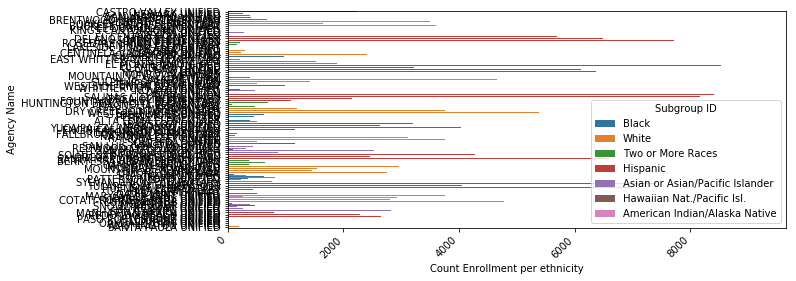

In [130]:
#Which is the ethnicity precence on each of these schools
plt.figure(figsize=(10, 4))
sns.barplot(x='Count Enrollment per ethnicity',y='Agency Name',hue='Subgroup ID',data=smaller_districts_df)
plt.xticks(rotation=45, ha='right')
plt.show()

In [131]:
smaller_corr_df= smaller_districts_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'Count Enrollment per ethnicity',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
smaller_corr_df.corr()

,Total Enrollment,Revenue per student,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,0.014934,0.050273,-0.011607,0.008001
Revenue per student,0.014934,1.000000,-0.252285,-0.238339,0.239932
Mean Scale Score,0.050273,-0.252285,1.000000,0.801617,-0.803947
Pass,-0.011607,-0.238339,0.801617,1.000000,-0.999377
Fail,0.008001,0.239932,-0.803947,-0.999377,1.000000


best fit line:
y = 2581.07 + -0.01x


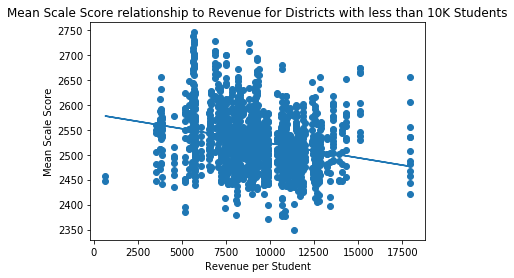

In [132]:
a, b = best_fit(smaller_districts_df['Revenue per student'],smaller_districts_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(smaller_districts_df['Revenue per student'],smaller_districts_df['Mean Scale Score'])
yfit = [a + b * xi for xi in smaller_districts_df['Revenue per student']]
plt.plot(smaller_districts_df['Revenue per student'], yfit)
plt.title('Mean Scale Score relationship to Revenue for Districts with less than 10K Students')
plt.xlabel('Revenue per Student')
_=plt.ylabel('Mean Scale Score')

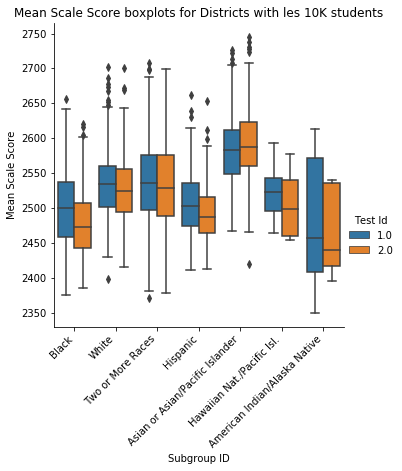

In [133]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=smaller_districts_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts with les 10K students')

best fit line:
y = 2511.05 + -0.00x


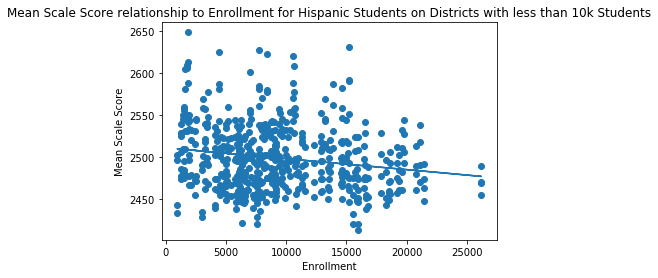

In [134]:
a, b = best_fit(sd_hispanic_df['Count Enrollment per ethnicity'],sd_hispanic_df['Mean Scale Score'])
import matplotlib.pyplot as plt
plt.scatter(sd_hispanic_df['Count Enrollment per ethnicity'],sd_hispanic_df['Mean Scale Score'])
yfit = [a + b * xi for xi in sd_hispanic_df['Count Enrollment per ethnicity']]
plt.plot(sd_hispanic_df['Count Enrollment per ethnicity'], yfit)
plt.title('Mean Scale Score relationship to Enrollment for Hispanic Students on Districts with less than 10k Students')
plt.xlabel('Enrollment')
_=plt.ylabel('Mean Scale Score')

In [135]:
srd_black_df = smaller_districts_df[smaller_districts_df['Subgroup ID']=='Black']
black_srd_corr_df= srd_black_df.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
black_srd_corr_df.corr()

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1.000000,-0.181758,0.251115,0.012138,0.030028,-0.034887
Revenue per student,-0.181758,1.000000,0.311665,-0.217438,-0.196387,0.200304
Count Enrollment per ethnicity,0.251115,0.311665,1.000000,-0.140371,-0.157504,0.157925
Mean Scale Score,0.012138,-0.217438,-0.140371,1.000000,0.740847,-0.744543
Pass,0.030028,-0.196387,-0.157504,0.740847,1.000000,-0.998653
Fail,-0.034887,0.200304,0.157925,-0.744543,-0.998653,1.000000


## Tiny districts: between 1,000 and 5,000 total enrollment

In [136]:
tiny_districts =df[(df['Total Enrollment'] < 5_000) & (df['Total Enrollment'] >= 1000)]
tiny_districts.head(5)

,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,...,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Percentate Std Exceed,Percentage Std Met,Percentage Std Nearly Met,Percentage Std Not Met,Percentage Std Met and Above,Pass,Fail
4441,61127.0,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.2,White,1368.0,1.0,2.0,2603.300000,...,88.0,41.0,Not Disadvantaged,53.0,28.0,13.0,6.0,81.0,81.0,19.0
4442,61127.0,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.2,White,1368.0,1.0,2.0,2576.400000,...,1.0,4.0,Disadvantaged,38.0,23.0,8.0,31.0,62.0,61.0,39.0
4443,61127.0,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.2,White,1368.0,1.0,1.0,2588.200000,...,2.0,2.0,Disadvantaged,8.0,62.0,15.0,15.0,69.0,70.0,30.0
4440,61127.0,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.2,White,1368.0,1.0,1.0,2601.885714,...,69.0,32.0,Not Disadvantaged,54.0,31.0,10.0,5.0,85.0,85.0,15.0
11113,61127.0,ALBANY CITY UNIFIED,3702.0,58211000.0,15724.2,Two or More Races,522.0,1.0,2.0,2588.185714,...,39.0,27.0,Not Disadvantaged,50.0,23.0,16.0,11.0,73.0,73.0,27.0


In [137]:
# correlation between the variables
corr= tiny_districts.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
corr=corr.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1,0.00148018,0.332668,0.0811932,0.118741,-0.117428
Revenue per student,0.00148018,1,0.129754,-0.238121,-0.265127,0.264933
Count Enrollment per ethnicity,0.332668,0.129754,1,-0.0800059,-0.0925791,0.0940096
Mean Scale Score,0.0811932,-0.238121,-0.0800059,1,0.819772,-0.820068
Pass,0.118741,-0.265127,-0.0925791,0.819772,1,-0.999629
Fail,-0.117428,0.264933,0.0940096,-0.820068,-0.999629,1


In [138]:
_ = plt.hist(tiny_districts_ID1['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

NameError: name 'tiny_districts_ID1' is not defined

In [ ]:
scatterplot1 = tiny_districts[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

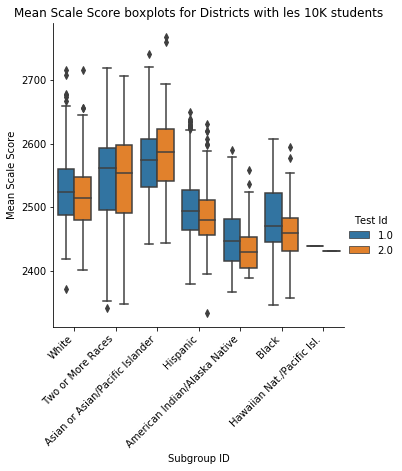

In [139]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=tiny_districts)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts with les 10K students')

In [ ]:
#_ = sns.catplot(x='Mean Scale Score', y="Revenue per student", hue="Subgroup ID", kind="swarm", data=tiny_districts_ID1)

## Mini districts: total enrollment less than 1,000

In [140]:
mini_districts = df[(df['Total Enrollment'] < 1000)]
print(mini_districts.shape)

mini_districts.head(5)

(728, 28)


,District Code,Agency Name,Total Enrollment,Total Revenue,Revenue per student,Subgroup ID,Count Enrollment per ethnicity,County Code,Test Id,Mean Scale Score,...,Total Standard Nearly Met,Total Standard Not Met,Disadvantaged,Percentate Std Exceed,Percentage Std Met,Percentage Std Nearly Met,Percentage Std Not Met,Percentage Std Met and Above,Pass,Fail
1816,61408.0,BIGGS UNIFIED,617.0,6067000.0,9833.06,Hispanic,231.0,4.0,2.0,2456.400000,...,26.0,53.0,Disadvantaged,0.0,10.0,30.0,60.0,10.0,10.0,90.0
1817,61408.0,BIGGS UNIFIED,617.0,6067000.0,9833.06,Hispanic,231.0,4.0,1.0,2442.516667,...,32.0,50.0,Disadvantaged,4.0,12.0,33.0,51.0,16.0,16.0,84.0
4630,61408.0,BIGGS UNIFIED,617.0,6067000.0,9833.06,White,348.0,4.0,1.0,2428.580000,...,13.0,32.0,Disadvantaged,10.0,19.0,21.0,51.0,29.0,29.0,72.0
4631,61408.0,BIGGS UNIFIED,617.0,6067000.0,9833.06,White,348.0,4.0,2.0,2418.950000,...,9.0,32.0,Disadvantaged,4.0,20.0,17.0,59.0,24.0,24.0,76.0
4632,61408.0,BIGGS UNIFIED,617.0,6067000.0,9833.06,White,348.0,4.0,2.0,2503.400000,...,10.0,16.0,Not Disadvantaged,0.0,19.0,31.0,50.0,19.0,19.0,81.0


In [141]:
# correlation between the variables
corr1tiny = tiny_districts.drop(columns=['District Code', 'Agency Name', 'Total Revenue',
       'County Code', 'Test Id',
       'Total Tested At Entity Level', 'Total Tested with Scores',
       'CAASPP Reported Enrollment', 'Students Tested', 'Students with Scores',
       'Total Standard Exceeded', 'Total Standard Met',
       'Total Standard Met and Above', 'Total Standard Nearly Met',
       'Total Standard Not Met', 'Percentate Std Exceed', 'Percentage Std Met',
       'Percentage Std Nearly Met', 'Percentage Std Not Met',
       'Percentage Std Met and Above'])
corr1tiny=corr1tiny.corr()
corr1tiny.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Total Enrollment,Revenue per student,Count Enrollment per ethnicity,Mean Scale Score,Pass,Fail
Total Enrollment,1,0.00148018,0.332668,0.0811932,0.118741,-0.117428
Revenue per student,0.00148018,1,0.129754,-0.238121,-0.265127,0.264933
Count Enrollment per ethnicity,0.332668,0.129754,1,-0.0800059,-0.0925791,0.0940096
Mean Scale Score,0.0811932,-0.238121,-0.0800059,1,0.819772,-0.820068
Pass,0.118741,-0.265127,-0.0925791,0.819772,1,-0.999629
Fail,-0.117428,0.264933,0.0940096,-0.820068,-0.999629,1


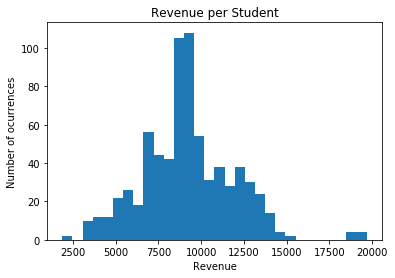

In [143]:
_ = plt.hist(mini_districts['Revenue per student'], density=False, bins=30)
_ = plt.ylabel('Number of ocurrences')
_ = plt.xlabel('Revenue')
_ = plt.title("Revenue per Student")

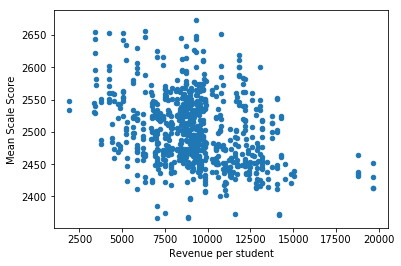

In [144]:
scatterplot1 = mini_districts[['Revenue per student', 'Mean Scale Score']]
scatterplot1
scatterplot1.plot.scatter(x='Revenue per student', y='Mean Scale Score')

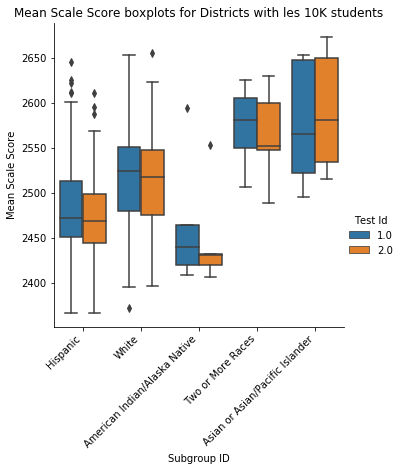

In [145]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=mini_districts)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts with les 10K students')

# When we see the distribution of revenue regardless of the size of the districts, we see a range of 4K to 14K in revenue per student.

# Will create a dataset with all districts on the lower revenue per student to see what is the size of those schools which seem to get the higher scores. See if we can find a pattern there.

In [146]:
low_revenue_df = df[df['Revenue per student'] <= 8000]
median_revenue_df=df[(df['Revenue per student'] > 8000) & (df['Revenue per student'] <= 12000)]

In [147]:
low_revenue_df['Total Enrollment'].describe()

count      2166.000000
mean      10477.005078
std       17208.167773
min         254.000000
25%        2432.000000
50%        5125.000000
75%       10659.000000
max      128040.000000
Name: Total Enrollment, dtype: float64

In [148]:
low_revenue_df['Mean Scale Score'].describe()

count    2166.000000
mean     2539.912026
std        62.744936
min      2366.600000
25%      2494.150000
50%      2536.700000
75%      2579.433333
max      2775.200000
Name: Mean Scale Score, dtype: float64

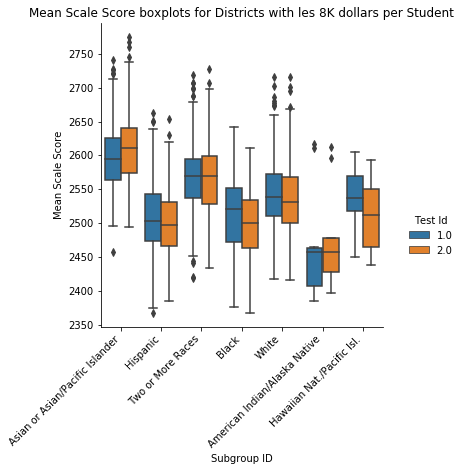

In [149]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=low_revenue_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts with les 8K dollars per Student')

In [150]:
#An all district groups we see the median or majority of the districts fall within this category
median_revenue_df['Total Enrollment'].describe()

count     4357.000000
mean     12901.822125
std      13361.732543
min        251.000000
25%       3219.000000
50%       9302.000000
75%      17326.000000
max      76428.000000
Name: Total Enrollment, dtype: float64

In [151]:
median_revenue_df['Revenue per student'].describe()

count     4357.000000
mean      9931.310675
std       1099.711102
min       8015.050000
25%       9024.950000
50%       9844.340000
75%      10752.940000
max      11999.510000
Name: Revenue per student, dtype: float64

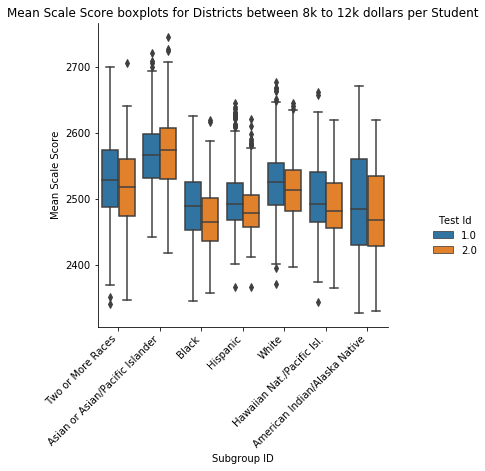

In [152]:
sns.catplot(x="Subgroup ID", y="Mean Scale Score", hue="Test Id", kind="box", data=median_revenue_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Mean Scale Score boxplots for Districts between 8k to 12k dollars per Student')

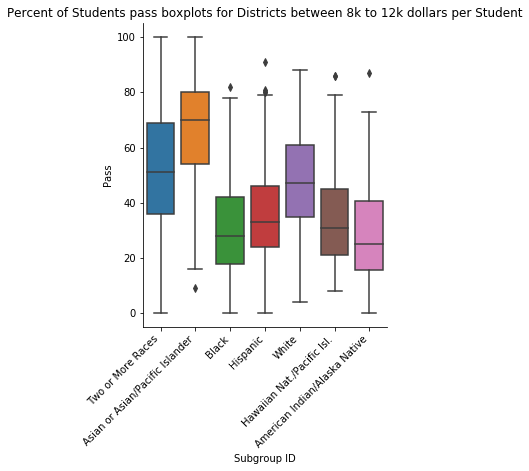

In [153]:
sns.catplot(x="Subgroup ID", y="Pass", kind="box", data=median_revenue_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Percent of Students pass boxplots for Districts between 8k to 12k dollars per Student')

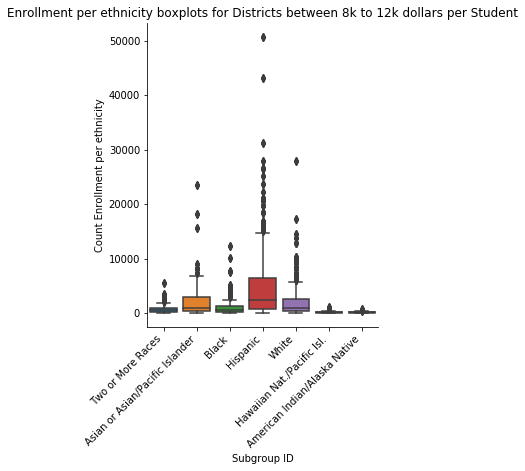

In [154]:
sns.catplot(x="Subgroup ID", y="Count Enrollment per ethnicity",kind="box", data=median_revenue_df)
plt.xticks(rotation=45, ha='right')
_=plt.title('Enrollment per ethnicity boxplots for Districts between 8k to 12k dollars per Student')

---------------

## Conclusions (as of now):
1. The correlation between revenue per student and students' outcome is a negative correlation regardless of the size in the district or the ethnic group.
2. There is also a negative correlation to District size with significative changes in the students's outcome, which show that black and hispanic students perform better on smaller Districts and have less differences with Asian and White Students.


## Observations:
1. We don't have the data overtime. It'll be hard to come to a conclusion if revenue is affecting test scores if we don't know what the test scores and revenue have been in the past.
2. Our conclusions will be based on the year we have the data for.

## NEXT STEPS:
1. How is the revenue used on schools with higher revenue? at this moment we don't have that data.
2. Where is the additional revenue coming from for the higher revenue schools.
3. Are there special programs that provide those resources? Lit2, Sports, etc. Are teachers paid more on those districts.
2. Merge poverty dataset from Census?
3. Come up with more questions to investigate?